In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Davis.csv', index_col=0).drop(columns=['repwt', 'repht'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     200 non-null    object
 1   weight  200 non-null    int64 
 2   height  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.2+ KB


In [3]:
train, test = train_test_split(df, test_size=50, stratify=df['sex'])

In [4]:
train.head()

,sex,weight,height
26,F,50,166
157,M,69,172
71,F,62,175
21,M,119,180
57,F,66,170


<AxesSubplot:ylabel='Frequency'>

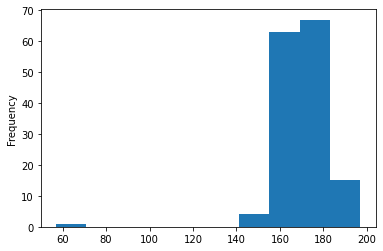

In [5]:
train['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

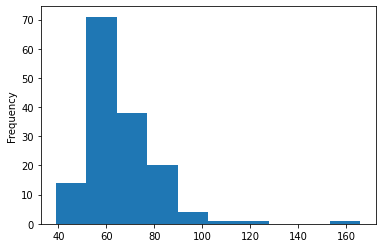

In [6]:
train['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

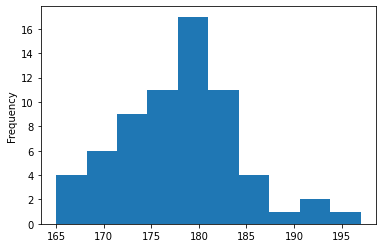

In [7]:
train[train.sex=='M']['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

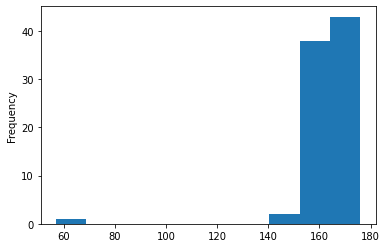

In [8]:
train[train.sex=='F']['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

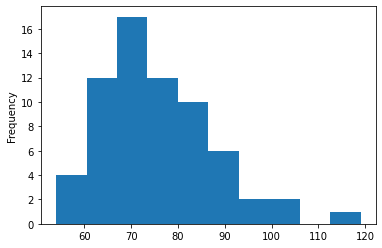

In [9]:
train[train.sex=='M']['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

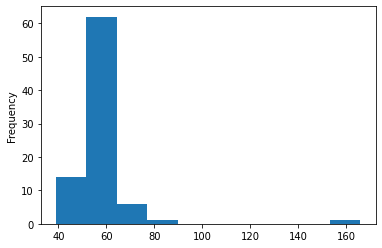

In [10]:
train[train.sex=='F']['weight'].plot(kind='hist')

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(train[['height', 'weight']], train['sex'])

LogisticRegression()

In [14]:
test['predicted'] = model.predict(test[['height', 'weight']])

In [15]:
test

,sex,weight,height,predicted
44,M,78,183,M
174,M,82,176,M
8,M,69,186,M
24,M,66,173,M
187,F,60,172,F
40,M,65,187,M
192,M,89,173,M
138,F,62,167,F
147,F,55,165,F
165,M,56,163,F


<AxesSubplot:xlabel='height', ylabel='weight'>

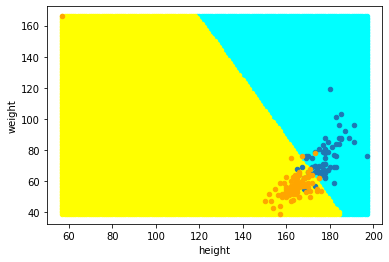

In [16]:
figure, axes = plt.subplots(1)

fill_ = []
for h in range(train['height'].min(), train['height'].max()+1):
    for w in range(train['weight'].min(), train['weight'].max()+1):
        fill_.append({'height': h, 'weight': w})
fill_df = pd.DataFrame(fill_)
fill_df['sex'] =  model.predict(fill_df[['height', 'weight']])

fill_df[fill_df['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                       color='#00FFFF')
fill_df[fill_df['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='yellow')

train[train['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes)
train[train['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='orange')

<AxesSubplot:xlabel='height', ylabel='weight'>

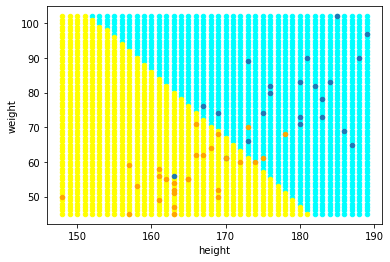

In [17]:
figure, axes = plt.subplots(1)

fill_ = []
for h in range(test['height'].min(), test['height'].max()+1):
    for w in range(test['weight'].min(), test['weight'].max()+1):
        fill_.append({'height': h, 'weight': w})
fill_df = pd.DataFrame(fill_)
fill_df['sex'] =  model.predict(fill_df[['height', 'weight']])

fill_df[fill_df['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                       color='#00FFFF')
fill_df[fill_df['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='yellow')

test[test['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes)
test[test['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='orange')